In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [3]:
import keras
keras.__version__

'2.4.3'

In [16]:
# Read csv file containing training datadata
train_df = pd.read_csv("train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()

There are 1000 rows and 16 columns in this data frame


,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [18]:
print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient ids are 1000, from those the unique ids are 928 


In [19]:
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


No.of Positives for each column

In [29]:
for column in train_df:
    if train_df[column].dtype!='object':
        print(column, train_df[column].sum())

Atelectasis 106
Cardiomegaly 20
Consolidation 33
Edema 16
Effusion 128
Emphysema 13
Fibrosis 14
Hernia 2
Infiltration 175
Mass 45
Nodule 54
PatientId 14742252
Pleural_Thickening 21
Pneumonia 10
Pneumothorax 38


In [41]:
image_dir = 'Files/nih/images-small/'
images = [image_dir+np.random.choice(train_df['Image'].values) for i in range(9)]
images

['Files/nih/images-small/00013408_006.png',
 'Files/nih/images-small/00015428_000.png',
 'Files/nih/images-small/00030415_000.png',
 'Files/nih/images-small/00001232_002.png',
 'Files/nih/images-small/00012736_000.png',
 'Files/nih/images-small/00001952_006.png',
 'Files/nih/images-small/00022237_007.png',
 'Files/nih/images-small/00001831_000.png',
 'Files/nih/images-small/00001297_000.png']

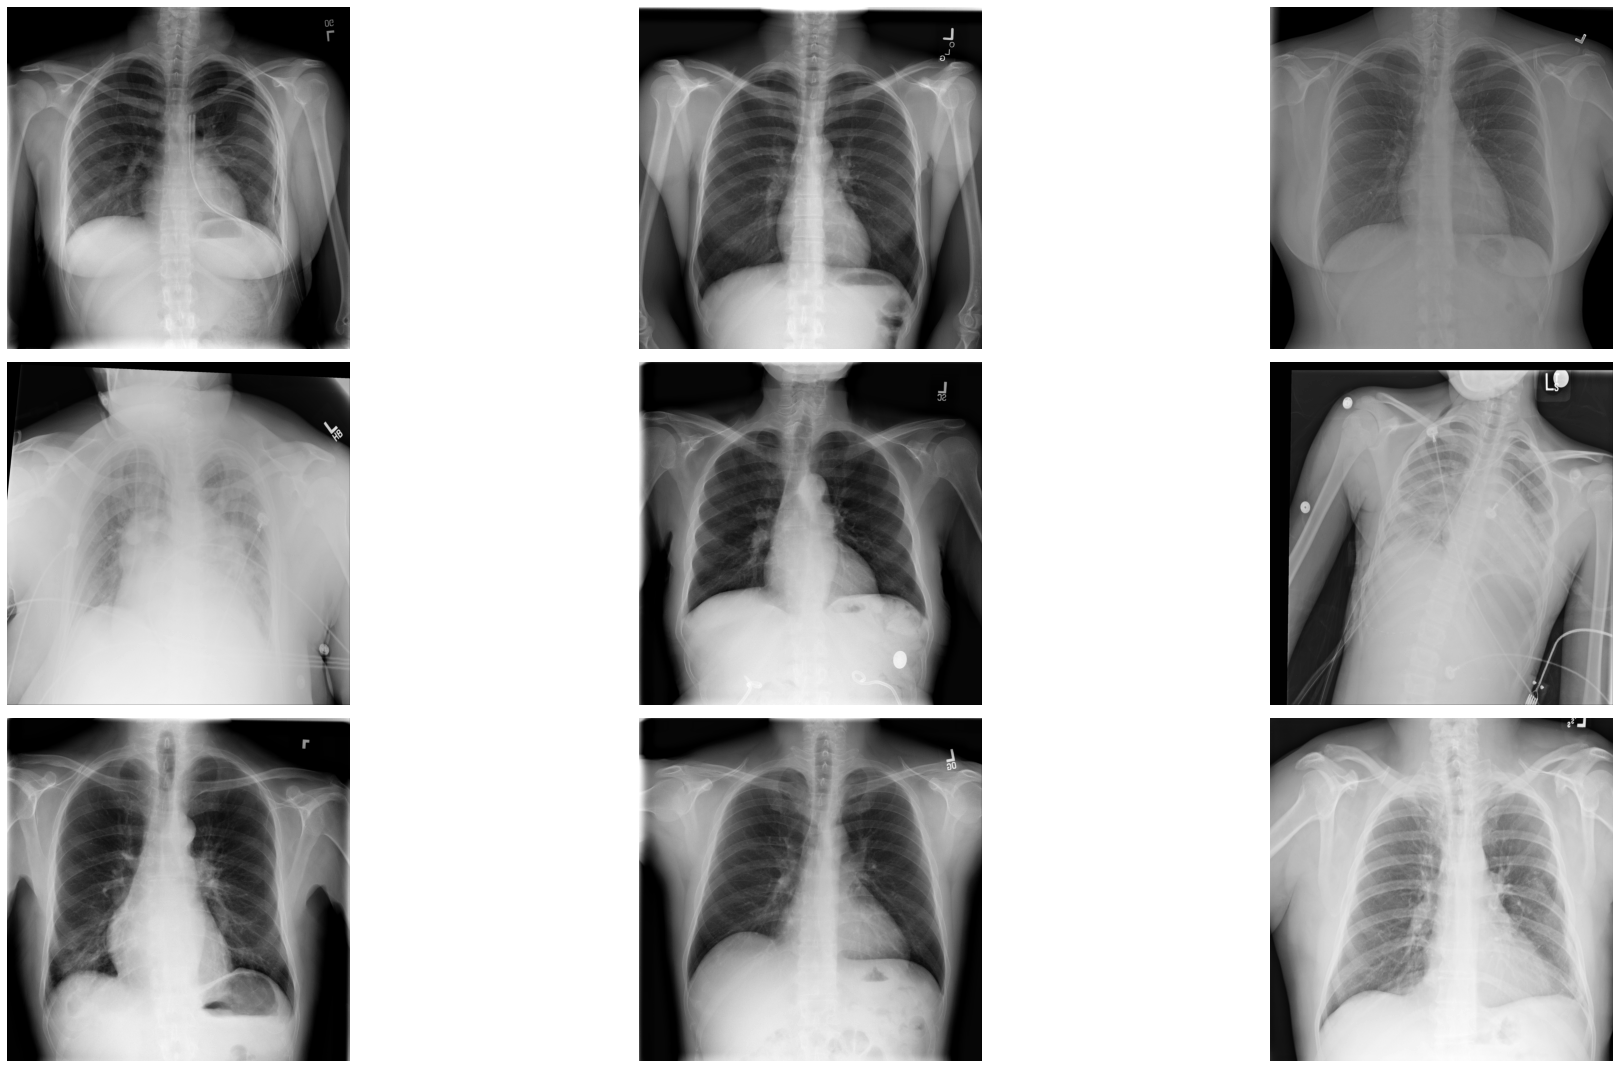

In [44]:
# Adjust the size of your images
plt.figure(figsize=(30,15))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

### Investigating the images

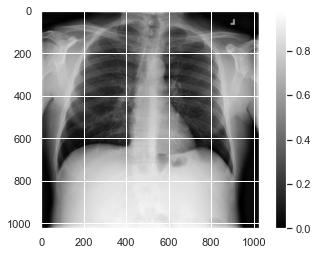

In [60]:
img = plt.imread(image_dir+train_df['Image'][0])
plt.imshow(img, cmap='gray')
plt.colorbar()

In [61]:
img.shape, img.max(), img.min()

((1024, 1024), 0.98039216, 0.0)

In [62]:
img.mean(), img.std()

(0.47961414, 0.275735)

### Pixel value distribution plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


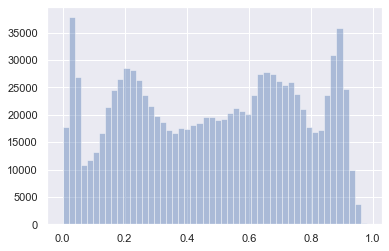

In [65]:
sns.distplot(img.ravel(), kde=False)

### Image processing in Keras 

In [68]:
# Import data generator from keras
from keras.preprocessing.image import ImageDataGenerator

In [69]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

In [70]:
generator = image_generator.flow_from_dataframe(
            dataframe=train_df,
            directory=image_dir,
            x_col = 'Image',
            y_col = ['Mass'],
            class_mode = "raw",
            batch_size = 1,
            shuffle = False,
            target_size = (320, 320)
)

Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.7999 and the minimum is -1.7404
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


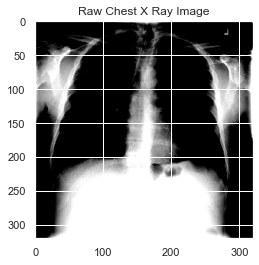

In [84]:
generated_image, label = generator.__getitem__(0)

plt.imshow(generated_image[0])

generated_image[0].shape, generated_image[0].mean()

plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")